In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates

# Stock Prices

In [2]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv("HistoricalPrices.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    61 non-null     object 
 1    Open   61 non-null     float64
 2    High   61 non-null     float64
 3    Low    61 non-null     float64
 4    Close  61 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.5+ KB


In [3]:
# Rename the column to remove an additional space
df = df.rename(columns = {' Open': 'Open', ' High': 'High', ' Low': 'Low', ' Close': 'Close'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    61 non-null     object 
 1   Open    61 non-null     float64
 2   High    61 non-null     float64
 3   Low     61 non-null     float64
 4   Close   61 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.5+ KB


In [4]:
# Convert the date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    61 non-null     datetime64[ns]
 1   Open    61 non-null     float64       
 2   High    61 non-null     float64       
 3   Low     61 non-null     float64       
 4   Close   61 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 2.5 KB


In [5]:
# Sort the dataset in the ascending order of date
df = df.sort_values(by = 'Date')
df.head()

,Date,Open,High,Low,Close
60,2024-03-22,39774.06,39824.76,39469.53,39475.90
59,2024-03-25,39410.54,39430.17,39296.03,39313.64
58,2024-03-26,39338.32,39439.44,39277.19,39282.33
57,2024-03-27,39461.98,39769.41,39461.98,39760.08
56,2024-03-28,39763.74,39868.59,39717.25,39807.37


In [6]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')


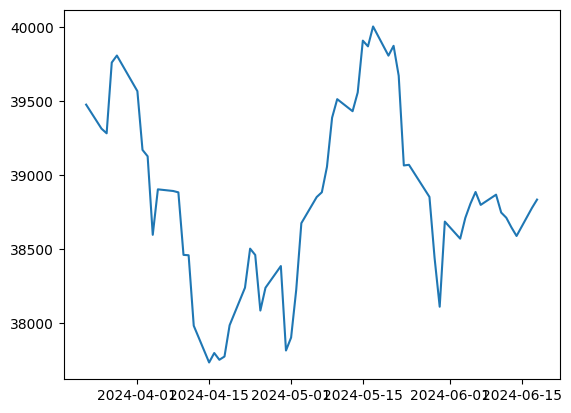

In [7]:
# Extract the date and close price columns
dates = df['Date']
closing_price = df['Close']

# Create a line plot
plt.plot(dates, closing_price)

# Show the plot
plt.show()

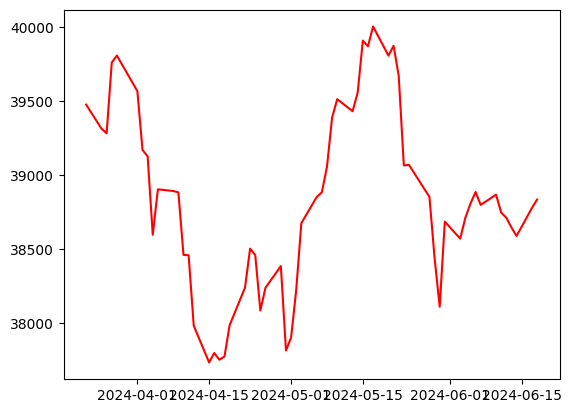

In [8]:
# Plot in Red colour
plt.plot(dates, closing_price, color='red')

# Show the plot
plt.show()

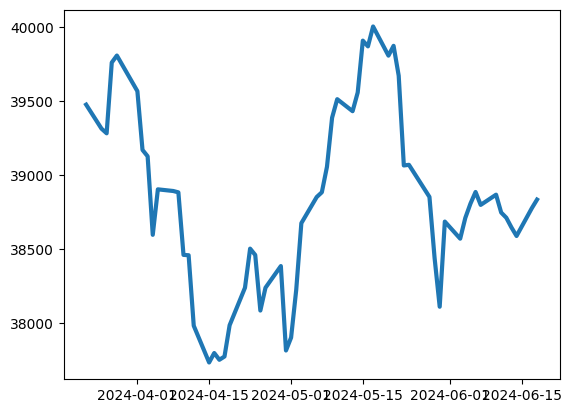

In [9]:
# Increasing the linewidth
plt.plot(dates, closing_price, linewidth=3)

# Show the plot
plt.show()

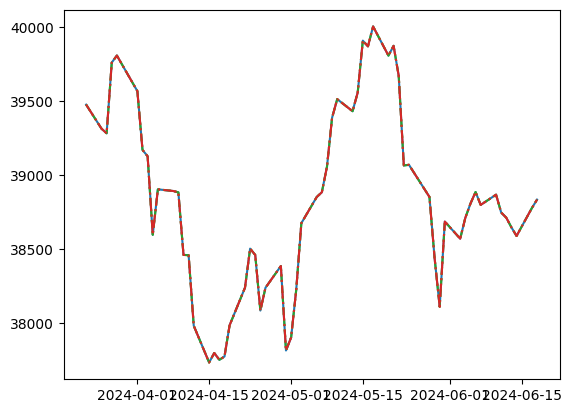

In [10]:
# Individually plot lines in solid, dotted, dashed and dashdot

plt.plot(dates, closing_price, linestyle='solid') # Default line style
plt.plot(dates, closing_price, linestyle='dotted')
plt.plot(dates, closing_price, linestyle='dashed')
plt.plot(dates, closing_price, linestyle='dashdot')

# Show the plot
plt.show()

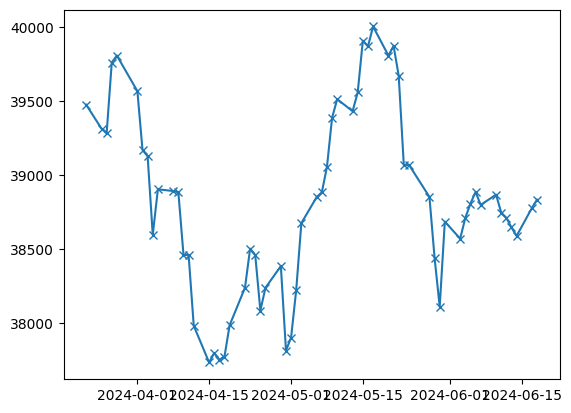

In [11]:
# Add a cross marker for each point
plt.plot(df['Date'], df['Close'], marker='x')

# Show the plot
plt.show()

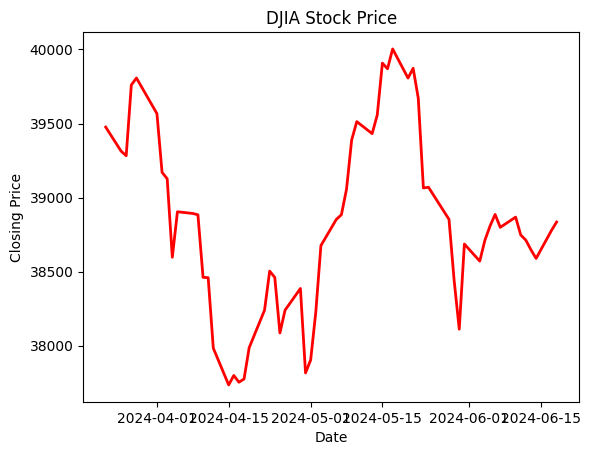

In [12]:
plt.plot(dates, closing_price, color='red', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('DJIA Stock Price')

# Show the plot
plt.show()

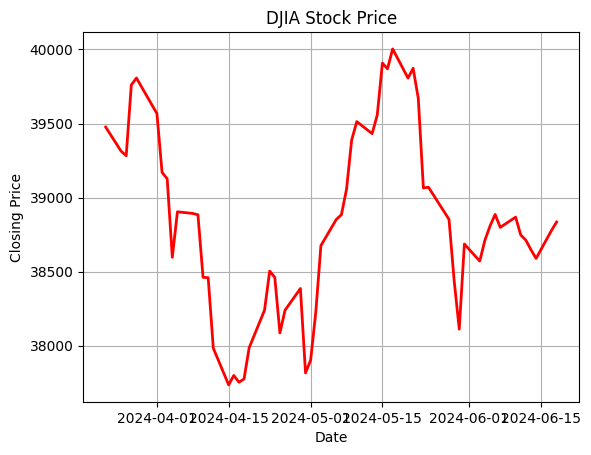

In [13]:
plt.plot(dates, closing_price, color='red', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('DJIA Stock Price')

# Add the grid
plt.grid(True)

# Show the plot
plt.show()

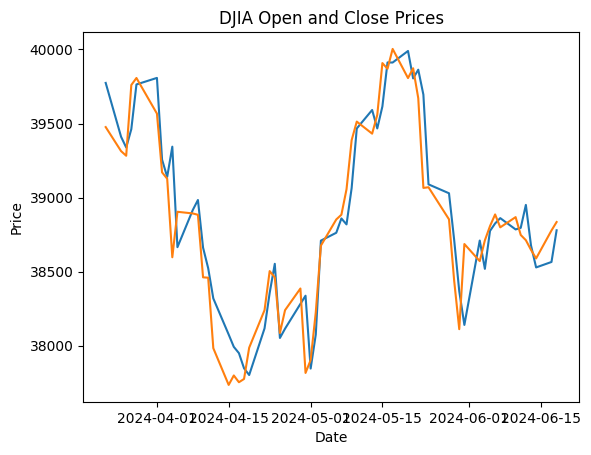

In [14]:
# Line plot of Open and Close prices

plt.plot(df['Date'], df['Open'])
plt.plot(df['Date'], df['Close'])
plt.title('DJIA Open and Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')

plt.show()

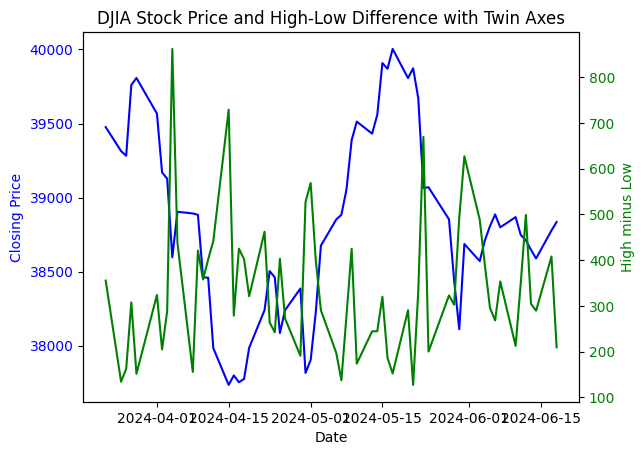

In [15]:
# Create a new variable for demonstration purposes
df['High_minus_Low'] = df['High'] - df['Low']

# Create a basic line plot for the Close prices
fig, ax1 = plt.subplots()
ax1.plot(df['Date'], df['Close'], color='blue', label='Close Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a twin axis for the High_minus_Low variable
ax2 = ax1.twinx()
ax2.plot(df['Date'], df['High_minus_Low'], color='green', label='High - Low')
ax2.set_ylabel('High minus Low', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add a title and show the plot
plt.title('DJIA Stock Price and High-Low Difference with Twin Axes')
plt.show()

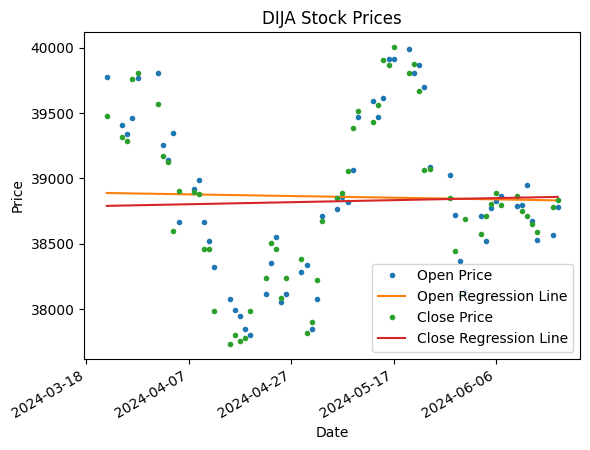

In [16]:
# Convert Date column to numeric value
df['Date'] = mdates.date2num(df['Date'])

# Add regression line to plot
coefficients_open = np.polyfit(df['Date'], df['Open'], 1)
p_open = np.poly1d(coefficients_open)

coefficients_close = np.polyfit(df['Date'], df['Close'], 1)
p_close = np.poly1d(coefficients_close)

fig, ax = plt.subplots()
ax.plot(df['Date'], df['Open'], '.', label='Open Price')
ax.plot(df['Date'], p_open(df['Date']), '-', label='Open Regression Line')
ax.plot(df['Date'], df['Close'], '.', label='Close Price')
ax.plot(df['Date'], p_close(df['Date']), '-', label='Close Regression Line')
ax.set_title('DIJA Stock Prices')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()

# Format x-axis labels as dates
date_form = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.gcf().autofmt_xdate()

plt.show()

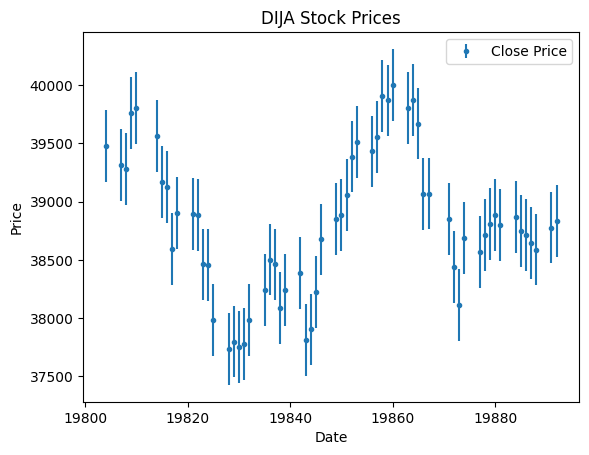

In [17]:
# Calculate standard deviation of data
std = df['Close'].std()

# Add error bars to plot
plt.errorbar(df['Date'], df['Close'], yerr=std/2, fmt='.', label='Close Price')
plt.title('DIJA Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Chunk Size

In [18]:
df = pd.read_csv("chunk_size.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   chunk_size         3 non-null      int64  
 1   context_recall     3 non-null      float64
 2   context_precision  3 non-null      float64
 3   context_f1         3 non-null      float64
dtypes: float64(3), int64(1)
memory usage: 228.0 bytes


In [19]:
df.head()

,chunk_size,context_recall,context_precision,context_f1
0,500,0.637795,0.063779,0.115962
1,1000,0.744094,0.074409,0.135290
2,2000,0.700787,0.070079,0.127416


In [20]:
df.columns

Index(['chunk_size', 'context_recall', 'context_precision', 'context_f1'], dtype='object')

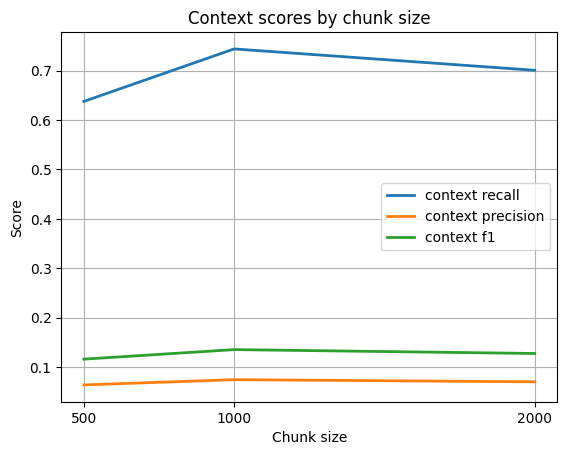

In [36]:
# Line plot of Open and Close prices

plt.plot(df['chunk_size'], df['context_recall'], label='context recall', linewidth=2,)
plt.plot(df['chunk_size'], df['context_precision'], label='context precision', linewidth=2)
plt.plot(df['chunk_size'], df['context_f1'], label='context f1', linewidth=2)
plt.title('Context scores by chunk size')
plt.xlabel('Chunk size')
plt.ylabel('Score')

plt.grid(True)
plt.legend()

plt.xticks(df['chunk_size'].unique())

plt.savefig('chunk_size.png', bbox_inches='tight')
plt.show()

# Day and calories

In [73]:
# Create a list of data to be represented in x-axis 
days = [ 'Saturday' , 'Sunday' , 'Monday' , 'Tuesday' , 
        'Wednesday' , 'Thursday' , 'Friday' ] 
  
# Create a list of data to be  
# represented in y-axis 
calories = [ 1670 , 2011 , 1853 , 2557 , 
            1390 , 2118 , 2063 ] 
  
# Create a dataframe using the two lists 
df_days_calories = pd.DataFrame( 
    { 'day' : days , 'calories' : calories }) 
  
df_days_calories

,day,calories
0,Saturday,1670
1,Sunday,2011
2,Monday,1853
3,Tuesday,2557
4,Wednesday,1390
5,Thursday,2118
6,Friday,2063


<Axes: xlabel='day'>

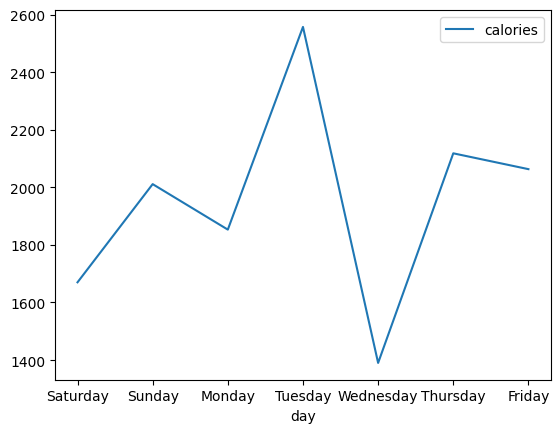

In [74]:
df_days_calories.plot( 'day' , 'calories' ) 

# Subjects and grades

In [76]:
subjects = [ 'Math' , 'English' , 'History' , 
            'Chem' , 'Geo' , 'Physics' , 'Bio' , 'CS' ] 
  
# Create a list of data to be  
# represented in y-axis 
stress = [ 9 , 3 , 5 , 1 , 8 , 5 , 10 , 2 ] 
  
# Create second list of data 
# to be represented in y-axis 
grades = [ 15 , 10 , 7 , 8 , 11 , 8 , 17 , 20 ] 
  
# Create a dataframe using the three lists 
df = pd.DataFrame(list(zip( stress , grades )), 
                  index = subjects ,  
                  columns = [ 'Stress' , 'Grades' ]) 
df 

,Stress,Grades
Math,9,15
English,3,10
History,5,7
Chem,1,8
Geo,8,11
Physics,5,8
Bio,10,17
CS,2,20


<Axes: >

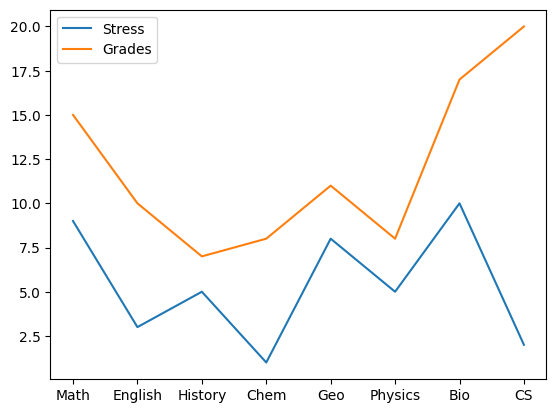

In [77]:
df.plot() 

<Axes: xlabel='Subject'>

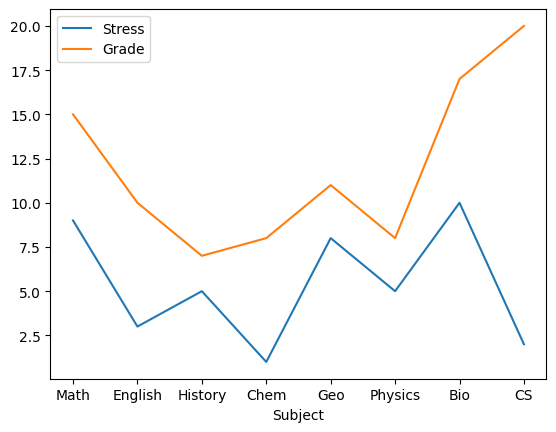

In [78]:
# Create a dataframe using the two lists 
df_days_calories = pd.DataFrame( 
    { 'Subject' : subjects ,  
     'Stress': stress ,  
     'Grade': grades}) 
  
ax = plt.gca() 
  
#use plot() method on the dataframe 
df_days_calories.plot( x = 'Subject' , y = 'Stress', ax = ax ) 
df_days_calories.plot( x = 'Subject' , y = 'Grade' , ax = ax ) 

# Coin

<Axes: title={'center': 'Total Coins per Day'}>

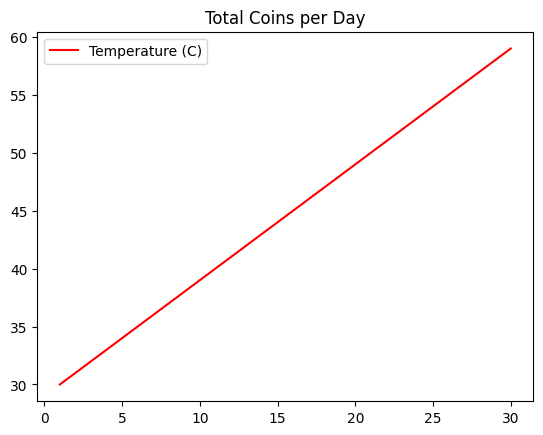

In [79]:
#initialize the temperature value at the first day of the month 
c = 30
  
# Create a dataframe using the three lists 
# the y-axis variable is a list created using 
# a for loops, in each iteration,  
# it adds 1 to previous value 
# the x-axis variable is a list of values ranging 
# from 1 to 31 (31 not included) with a step of 1 
df = pd.DataFrame([ c + x for x in range( 0 , 30 )], 
                  index = [*range( 1 , 31 , 1 )], 
                  columns = [ 'Temperature (C)' ]) 
  
# use plot() method on the dataframe.  
# No parameters are passed so it uses  
# variables given in the dataframe 
df.plot(color='red', title = 'Total Coins per Day') 

# List

<Axes: xlabel='List3'>

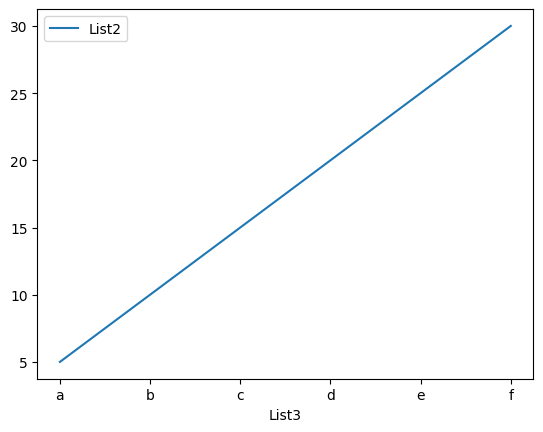

In [80]:
df = pd.DataFrame( 
    {'List1': [ 1 , 2 , 3 , 4 , 5 , 6 ],  
     'List2': [ 5 , 10 , 15 , 20 , 25 , 30 ],  
     'List3': [ 'a' , 'b' , 'c' , 'd' , 'e' , 'f' ]}) 
  
# use plot() method on the dataframe. 
# List3 is in the x-axis and List2 in the y-axis 
df.plot( 'List3' , 'List2' ) 

# References
- https://www.datacamp.com/tutorial/line-plots-in-matplotlib-with-python
- https://www.geeksforgeeks.org/time-series-plot-or-line-plot-with-pandas/